# Problem Statement
Output variable -> y


y -> Whether the client has subscribed a term deposit or not 




Binomial ("yes" or "no")


# import libraries

In [1]:
# importing the liabraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Importing CSV File

In [2]:
pd.read_csv('bank-full.csv')
# here dataset is not in tablized form and seperated by ;
# so we would use sep=';'

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [3]:
#importing dataset
df=pd.read_csv('bank-full.csv',sep=';') 
# here sep by ; is given because dataset is not in tablized form and seperated by ;
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [4]:
# to see the rows and columns
df.shape

(45211, 17)

In [5]:
# to see number of the duplicated rows
df.duplicated().sum()

0

In [6]:
# to see the unique variables in the job column
np.unique(df.job)

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [7]:
# to see is there any null values in the dataframe
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# to see the statistical patameters 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# to get the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [11]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [12]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [13]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

##### Customizing Hot Encoding (get_dummies) to the  data

In [14]:
# one hot encoding used to change the chategorical column to the numerical column by making every variable a column
df1=pd.get_dummies(df,columns=['job','marital','education','contact','month','poutcome'])
# here the default,housing, loan and y columns not taken because they got only two values yes and no
df1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [15]:
# to see the datatypes and other info about new data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

##### Customizing binary encoding to data ( for yes and no type data columns)

In [16]:
df1['default'] = np.where(df1['default'].str.contains("yes"), 1, 0) 
#converts the values in the 'default' column of d1 into binary values:
#1 if the original value contained "yes" and 0 if it didn't
df1['housing'] = np.where(df1['housing'].str.contains("yes"), 1, 0)
df1['loan'] = np.where(df1['loan'].str.contains("yes"), 1, 0)
df1['y'] = np.where(df1['y'].str.contains("yes"), 1, 0)
df1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


# Visualization

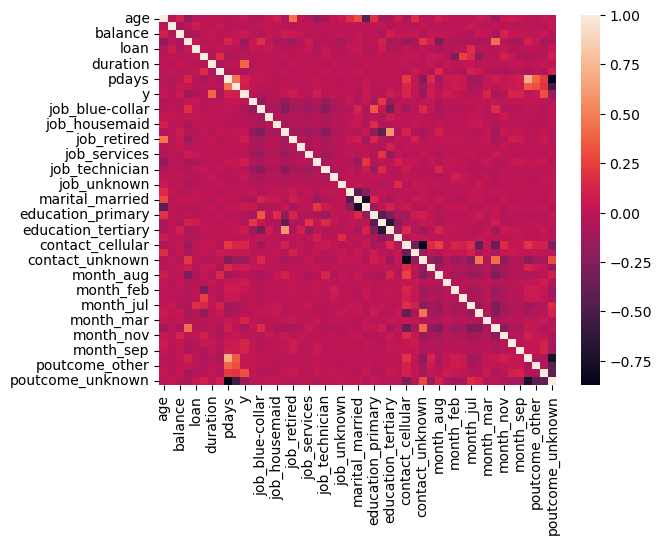

In [17]:
# heatmap
sns.heatmap(df1.corr())
plt.show()

# Building Model

### Splitting input variables and output variables

In [18]:
# to check the y column location for further use
df1.columns 

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [19]:
# as wee can see that the y is at 11th position which means 10th index column

In [20]:
# giving the data without including the 10th column
X=pd.concat([df1.iloc[:,0:10],df1.iloc[:,11:-1]],axis=1)
# we can also use X=df1.drop('y',axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  job_admin.           45211 non-null  uint8
 11  job_blue-collar      45211 non-null  uint8
 12  job_entrepreneur     45211 non-null  uint8
 13  job_housemaid        45211 non-null  uint8
 14  job_management       45211 non-null  uint8
 15  job_retired          45211 non-null  uint8
 16  job_self-employed    4

In [21]:
# giving the output column that is y to the Y variable
Y=df1.iloc[:,10]
# we can also use Y=df1.y
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: y
Non-Null Count  Dtype
--------------  -----
45211 non-null  int32
dtypes: int32(1)
memory usage: 176.7 KB


##### Splitting Data into train test by train test split

In [22]:
#deviding data for training and testing by train test split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.30,shuffle=True)

In [23]:
# defining the model
model = LogisticRegression()

In [24]:
model = model.fit(Xtrain,ytrain)

# Checking the Model Prediction

#### Predicting xtest data value to the model

In [25]:
# to see the y values predicted by model
y_predict=model.predict(Xtest)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
# to dividing the values that are actual and predicted
y_pred_df1= pd.DataFrame({'actual': ytest,
                         'predicted_prob': model.predict(Xtest)})
y_pred_df1

,actual,predicted_prob
44781,1,0
14730,1,0
40936,0,0
8597,0,0
21121,0,0
...,...,...
7919,0,0
37483,0,0
13488,0,0
30465,0,0


# Testing The Model

In [27]:
# Checking accuracy of ytest actual vs ytest prediction
accuracy_score(ytest,y_predict)

0.892288410498378

# inference
The accuracy of 89.37% suggests that the model performs reasonably well in predicting the outcome variable. The error rate, which is equal to 1 minus the accuracy, would be approximately 10.63% (1 - 0.8937). This represents the proportion of instances that the model predicted incorrectly.

In [28]:
# confusion matrix used to see the actual true and false with predicted true and false values
confusion_matrix(ytest,y_predict)

array([[11805,   192],
       [ 1269,   298]], dtype=int64)

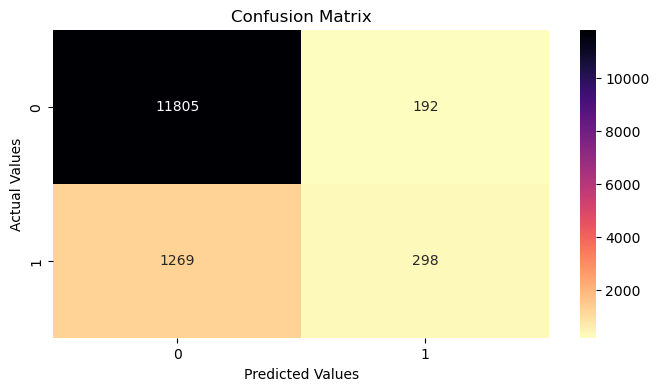

In [29]:
#Visualizing using Confusion Matrix
cm=confusion_matrix(ytest,y_predict)
plt.figure(figsize=(8,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='magma_r')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')
plt.show()

In [30]:
model.score(Xtest,ytest)

0.892288410498378

In [31]:
# Classification report
print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11997
           1       0.61      0.19      0.29      1567

    accuracy                           0.89     13564
   macro avg       0.76      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



# Inference
as we can see that the prediction of 0 values precision is very high and recall is also high with the precision with 1 is decent one and as we can see for f1 score as well which is decent.

In [32]:
# to see the prediction probability
model.predict_proba(Xtest)

array([[0.87746493, 0.12253507],
       [0.63881301, 0.36118699],
       [0.92634642, 0.07365358],
       ...,
       [0.96044797, 0.03955203],
       [0.96171207, 0.03828793],
       [0.88831478, 0.11168522]])

# Visualization

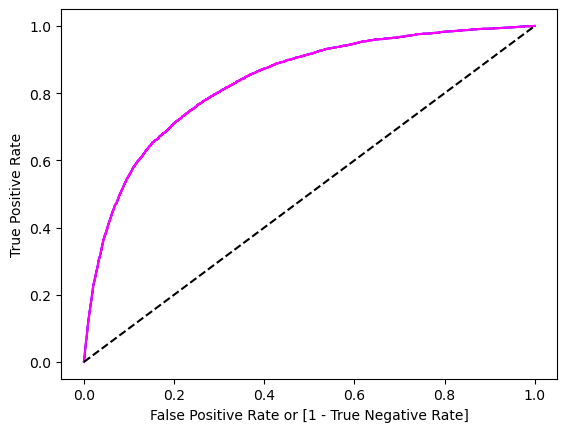

auc accuracy: 0.5870841513824532


In [33]:
fpr,tpr,thresholds=roc_curve(Y,model.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='blue')
auc=roc_auc_score(ytest,y_predict)

plt.plot(fpr,tpr,color='magenta',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

# inference
Based on the AUC value of 0.5951, you can infer that the logistic regression model has limited discriminatory power in separating the positive and negative classes. It may not be very effective in predicting the outcome variable, and there is room for improvement in the model's performance.